In [1]:
#第3章/定义测试函数
from matplotlib import pyplot as plt
%matplotlib inline
import torch


def test(pipeline):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    pipeline = pipeline.to(device)

    images = pipeline(batch_size=8,
                      num_inference_steps=1000,
                      output_type='numpy').images

    pipeline.to('cpu')
    torch.cuda.empty_cache()

    images = (images * 255).round().astype('uint8')

    plt.figure(figsize=(10, 5))
    for i in range(8):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i])
        plt.axis('off')

    plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

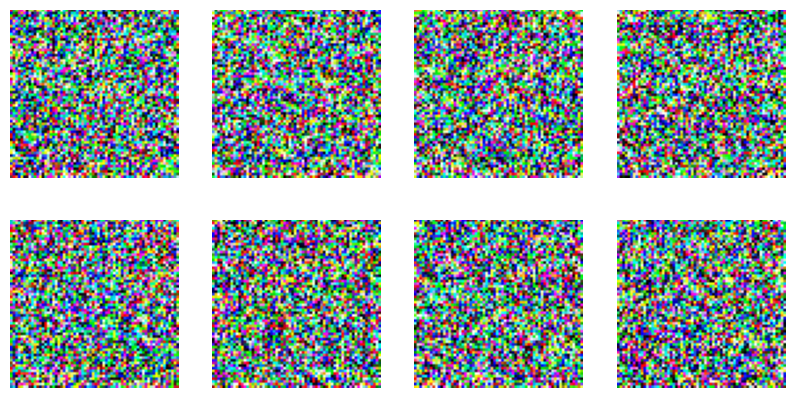

In [2]:
#第3章/测试未训练的模型
from diffusers import DDPMPipeline, UNet2DModel, DDPMScheduler

#定义模型,随机初始化参数
model = UNet2DModel(
    sample_size=64,
    in_channels=3,
    out_channels=3,
    layers_per_block=2,
    block_out_channels=(128, 128, 256, 256, 512, 512),
    down_block_types=(
        'DownBlock2D',
        'DownBlock2D',
        'DownBlock2D',
        'DownBlock2D',
        'AttnDownBlock2D',
        'DownBlock2D',
    ),
    up_block_types=(
        'UpBlock2D',
        'AttnUpBlock2D',
        'UpBlock2D',
        'UpBlock2D',
        'UpBlock2D',
        'UpBlock2D',
    ),
)

#初始化工具类
scheduler = DDPMScheduler(num_train_timesteps=1000,
                          beta_schedule='linear',
                          prediction_type='epsilon')

test(DDPMPipeline(unet=model, scheduler=scheduler))

  0%|          | 0/1000 [00:00<?, ?it/s]

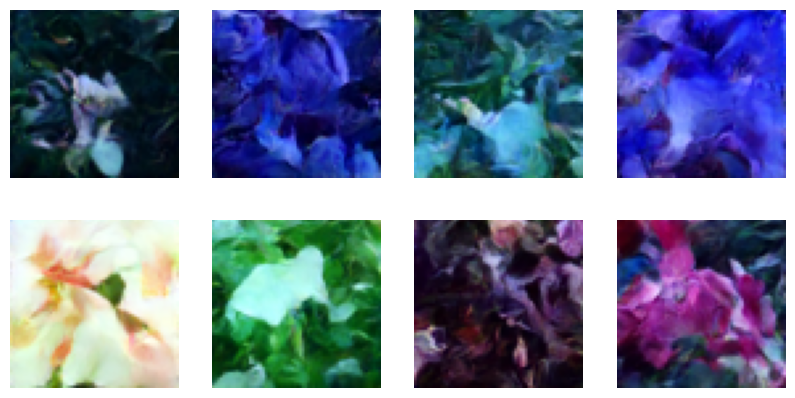

In [3]:
#第3章/测试训练好的的模型
test(DDPMPipeline.from_pretrained('./save'))

  0%|          | 0/1000 [00:00<?, ?it/s]

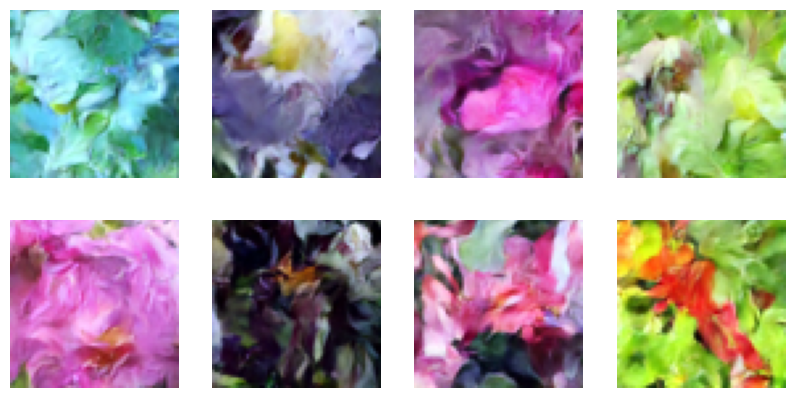

In [4]:
#第3章/在线加载笔者训练好的模型并测试
test(DDPMPipeline.from_pretrained('lansinuote/diffusion.1.unconditional'))